In [1]:
# Import Library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve
from datetime import date, timedelta

In [2]:
# Import file csv Data Covid-19
df = pd.read_csv(r"C:\Users\yakub\OneDrive\Documents\Feraldi\Data olah covid - Tugas Mengolah dan Menganalisis Data Covid-19 di United Kingdom.csv")

In [3]:
# Menyaring data covid untuk lokasi United Kingdom
df_uk = df[df["location"] == "United Kingdom"]
df_uk = df_uk.reset_index(drop = True)

In [4]:
# Menyaring data untuk kolom "date" dan "total_cases"
df_uk = df_uk[["date", "total_cases"]]

In [5]:
#Menampilkan 5 data pertama
df_uk.head()

,date,total_cases
0,2020-01-31,2.0
1,2020-02-01,2.0
2,2020-02-02,2.0
3,2020-02-03,8.0
4,2020-02-04,8.0


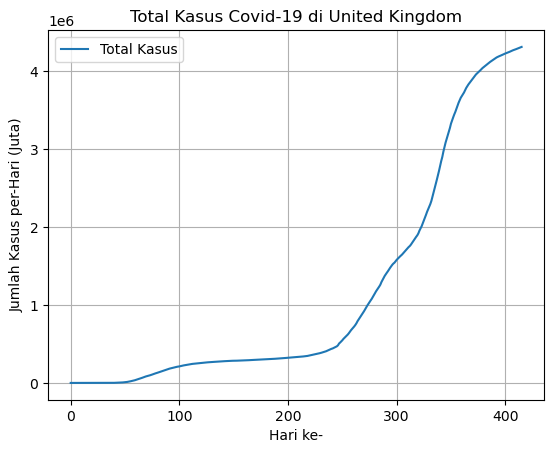

In [6]:
# Melakukan visualisasi data
plt.plot(df_uk.index, df_uk["total_cases"], label = "Total Kasus")
plt.title("Total Kasus Covid-19 di United Kingdom")
plt.xlabel("Hari ke-")
plt.ylabel("Jumlah Kasus per-Hari (Juta)")
plt.grid()
plt.legend(loc = "best")
plt.show()

In [7]:
# Membuat fungsi sigmoid
def sigmoid(t, a, t0, c): 
    return c / (1 + np.exp(-(t-t0) / (a))) 

In [8]:
# Melakukan fitting model berdasarkan fungsi sigmoid dan data total kasus Covid-19 di UK
x = list(df_uk.index)
y = list(df_uk["total_cases"])

df_uk_prediksi = curve_fit(sigmoid, x, y, method = "lm")
varA, varB = df_uk_prediksi

std_er = np.zeros(len(varA)) 
for i in range(len(varA)): 
    std_er[i] = np.sqrt(varB[i][i])

In [9]:
# Didapatkan model prediksi adalah fungsi sigmoid dengan parameter sebagai berikut
a = varA[0] + std_er[0] 
t0 = varA[1] + std_er[1] 
c = varA[2] + std_er[2]

In [10]:
# Memembuat data prediksi wabah Covid-19 di UK berdasarkan model yang telah dibuat
def prediksi(x): 
    return sigmoid(x, a, t0, c) - int(c)

n_puncak = fsolve(prediksi, t0)
n_puncak = int(np.rint(n_puncak[0]))

x_prediksi = list(range(n_puncak))
y_prediksi = np.zeros(len(x_prediksi))
for i in range(n_puncak):
    y_prediksi[i] = sigmoid(i, a, t0, c)

In [11]:
print("Puncak wabah Covid-19 di UK diprediksi muncul pada hari ke-{}".format(x_prediksi[-1] + 1))
print("Puncak wabah Covid-19 di UK diprediksi muncul {} hari setelah data terakhir yaitu pada hari ke-{}".format((x_prediksi[-1] + 1) - (x[-1] + 1), (x[-1] + 1)))
print("Puncak wabah Covid-19 di UK diprediksi menyebabkan total kasus sebanyak {}".format(int(np.rint(y_prediksi[-1]))))

Puncak wabah Covid-19 di UK diprediksi muncul pada hari ke-1217
Puncak wabah Covid-19 di UK diprediksi muncul 801 hari setelah data terakhir yaitu pada hari ke-416
Puncak wabah Covid-19 di UK diprediksi menyebabkan total kasus sebanyak 5352833


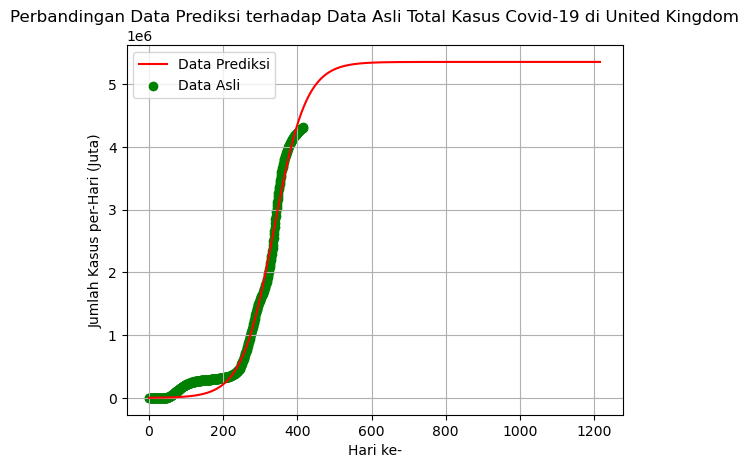

In [12]:
# melakukan visualisasi perbandingan data prediksi terhadap data asli
plt.plot(x_prediksi, y_prediksi, label = "Data Prediksi", color = "red") 
plt.scatter(x, y, label = "Data Asli", color = "green")
plt.title("Perbandingan Data Prediksi terhadap Data Asli Total Kasus Covid-19 di United Kingdom")
plt.xlabel("Hari ke-") 
plt.ylabel("Jumlah Kasus per-Hari (Juta)") 
plt.grid()
plt.legend(loc="best") 
plt.show() 

In [13]:
# Menilai akurasi data prediksi terhadap data asli
def akurasi_R2(y_asli, y_prediksi, x): 
    atas = sum((y_asli - y_prediksi[0:len(x)]) ** 2) 
    bawah = sum(((y_asli - np.mean(y))) **2) 
    r = 1 - (atas/bawah) 
    return r

akurasi = akurasi_R2(y, y_prediksi, x)
akurasi_round = np.around(akurasi, 4)

print("Akurasi data prediksi adalah {}".format(akurasi))
print("Akurasi dibulatkan menjadi {}%".format(akurasi_round * 100))

Akurasi data prediksi adalah 0.9892448385255183
Akurasi dibulatkan menjadi 98.92%


In [14]:
# Menentukan tanggal prediksi puncak wabah Covid-19 di UK
tanggal = df_uk["date"].iloc[-1]

tanggal_tahun = int(tanggal[0:4])

if tanggal[5] == "0":
    tanggal_bulan = int(tanggal[6])
else:
    tanggal_bulan = int(tanggal[5:7])

if tanggal[8] == "0":
    tanggal_tanggal = int(tanggal[9])
else:
    tanggal_tanggal = int(tanggal[8:10])

tanggal_terakhir = date(tanggal_tahun, tanggal_bulan, tanggal_tanggal)
tanggal_puncak = tanggal_terakhir + timedelta(days = (x_prediksi[-1] + 1) - (x[-1] + 1))

print("Puncak wabah Covid-19 di UK diprediksi jatuh pada tanggal {} (yyyy-mm-dd)".format(tanggal_puncak))

Puncak wabah Covid-19 di UK diprediksi jatuh pada tanggal 2023-05-31 (yyyy-mm-dd)


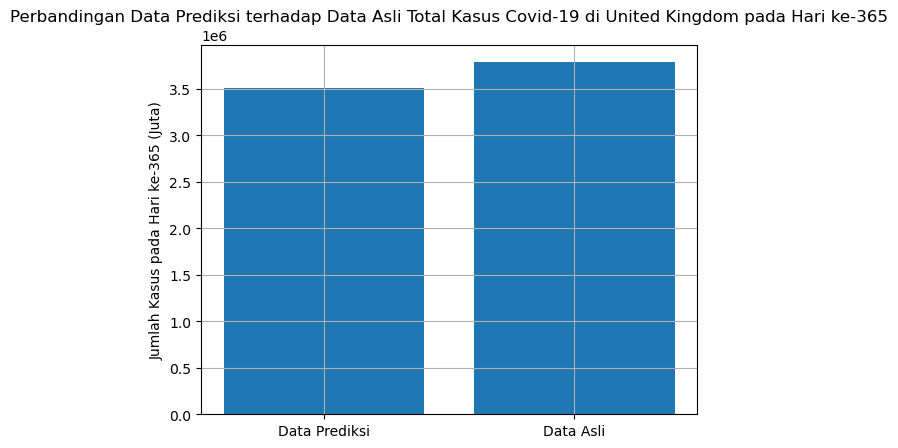

In [15]:
# Case Study: melakukan visualisai perbandingan data prediksi terhadap data asli pada hari ke-365
label = ["Data Prediksi", "Data Asli"] 
value = [y_prediksi[365 - 1], y[365 - 1]]
plt.bar(label, value)
plt.title("Perbandingan Data Prediksi terhadap Data Asli Total Kasus Covid-19 di United Kingdom pada Hari ke-365")
plt.ylabel("Jumlah Kasus pada Hari ke-365 (Juta)")
plt.grid()
plt.show()